In [25]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
data = pd.read_csv(r"C:\Users\71589\Desktop\customer_segmentation.csv")

In [27]:
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [28]:
# Fill missing Income values or drop rows
data['Income'].fillna(data['Income'].median(), inplace=True)  # Using median to fill missing Income values

In [29]:
# Drop columns that aren't useful for clustering
data = data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

In [30]:
# Select numeric columns for clustering
numeric_data = data.select_dtypes(include=['float64', 'int64']).dropna().reset_index(drop=True)

## # Step 2: Data Visualization


<Figure size 1000x1000 with 0 Axes>

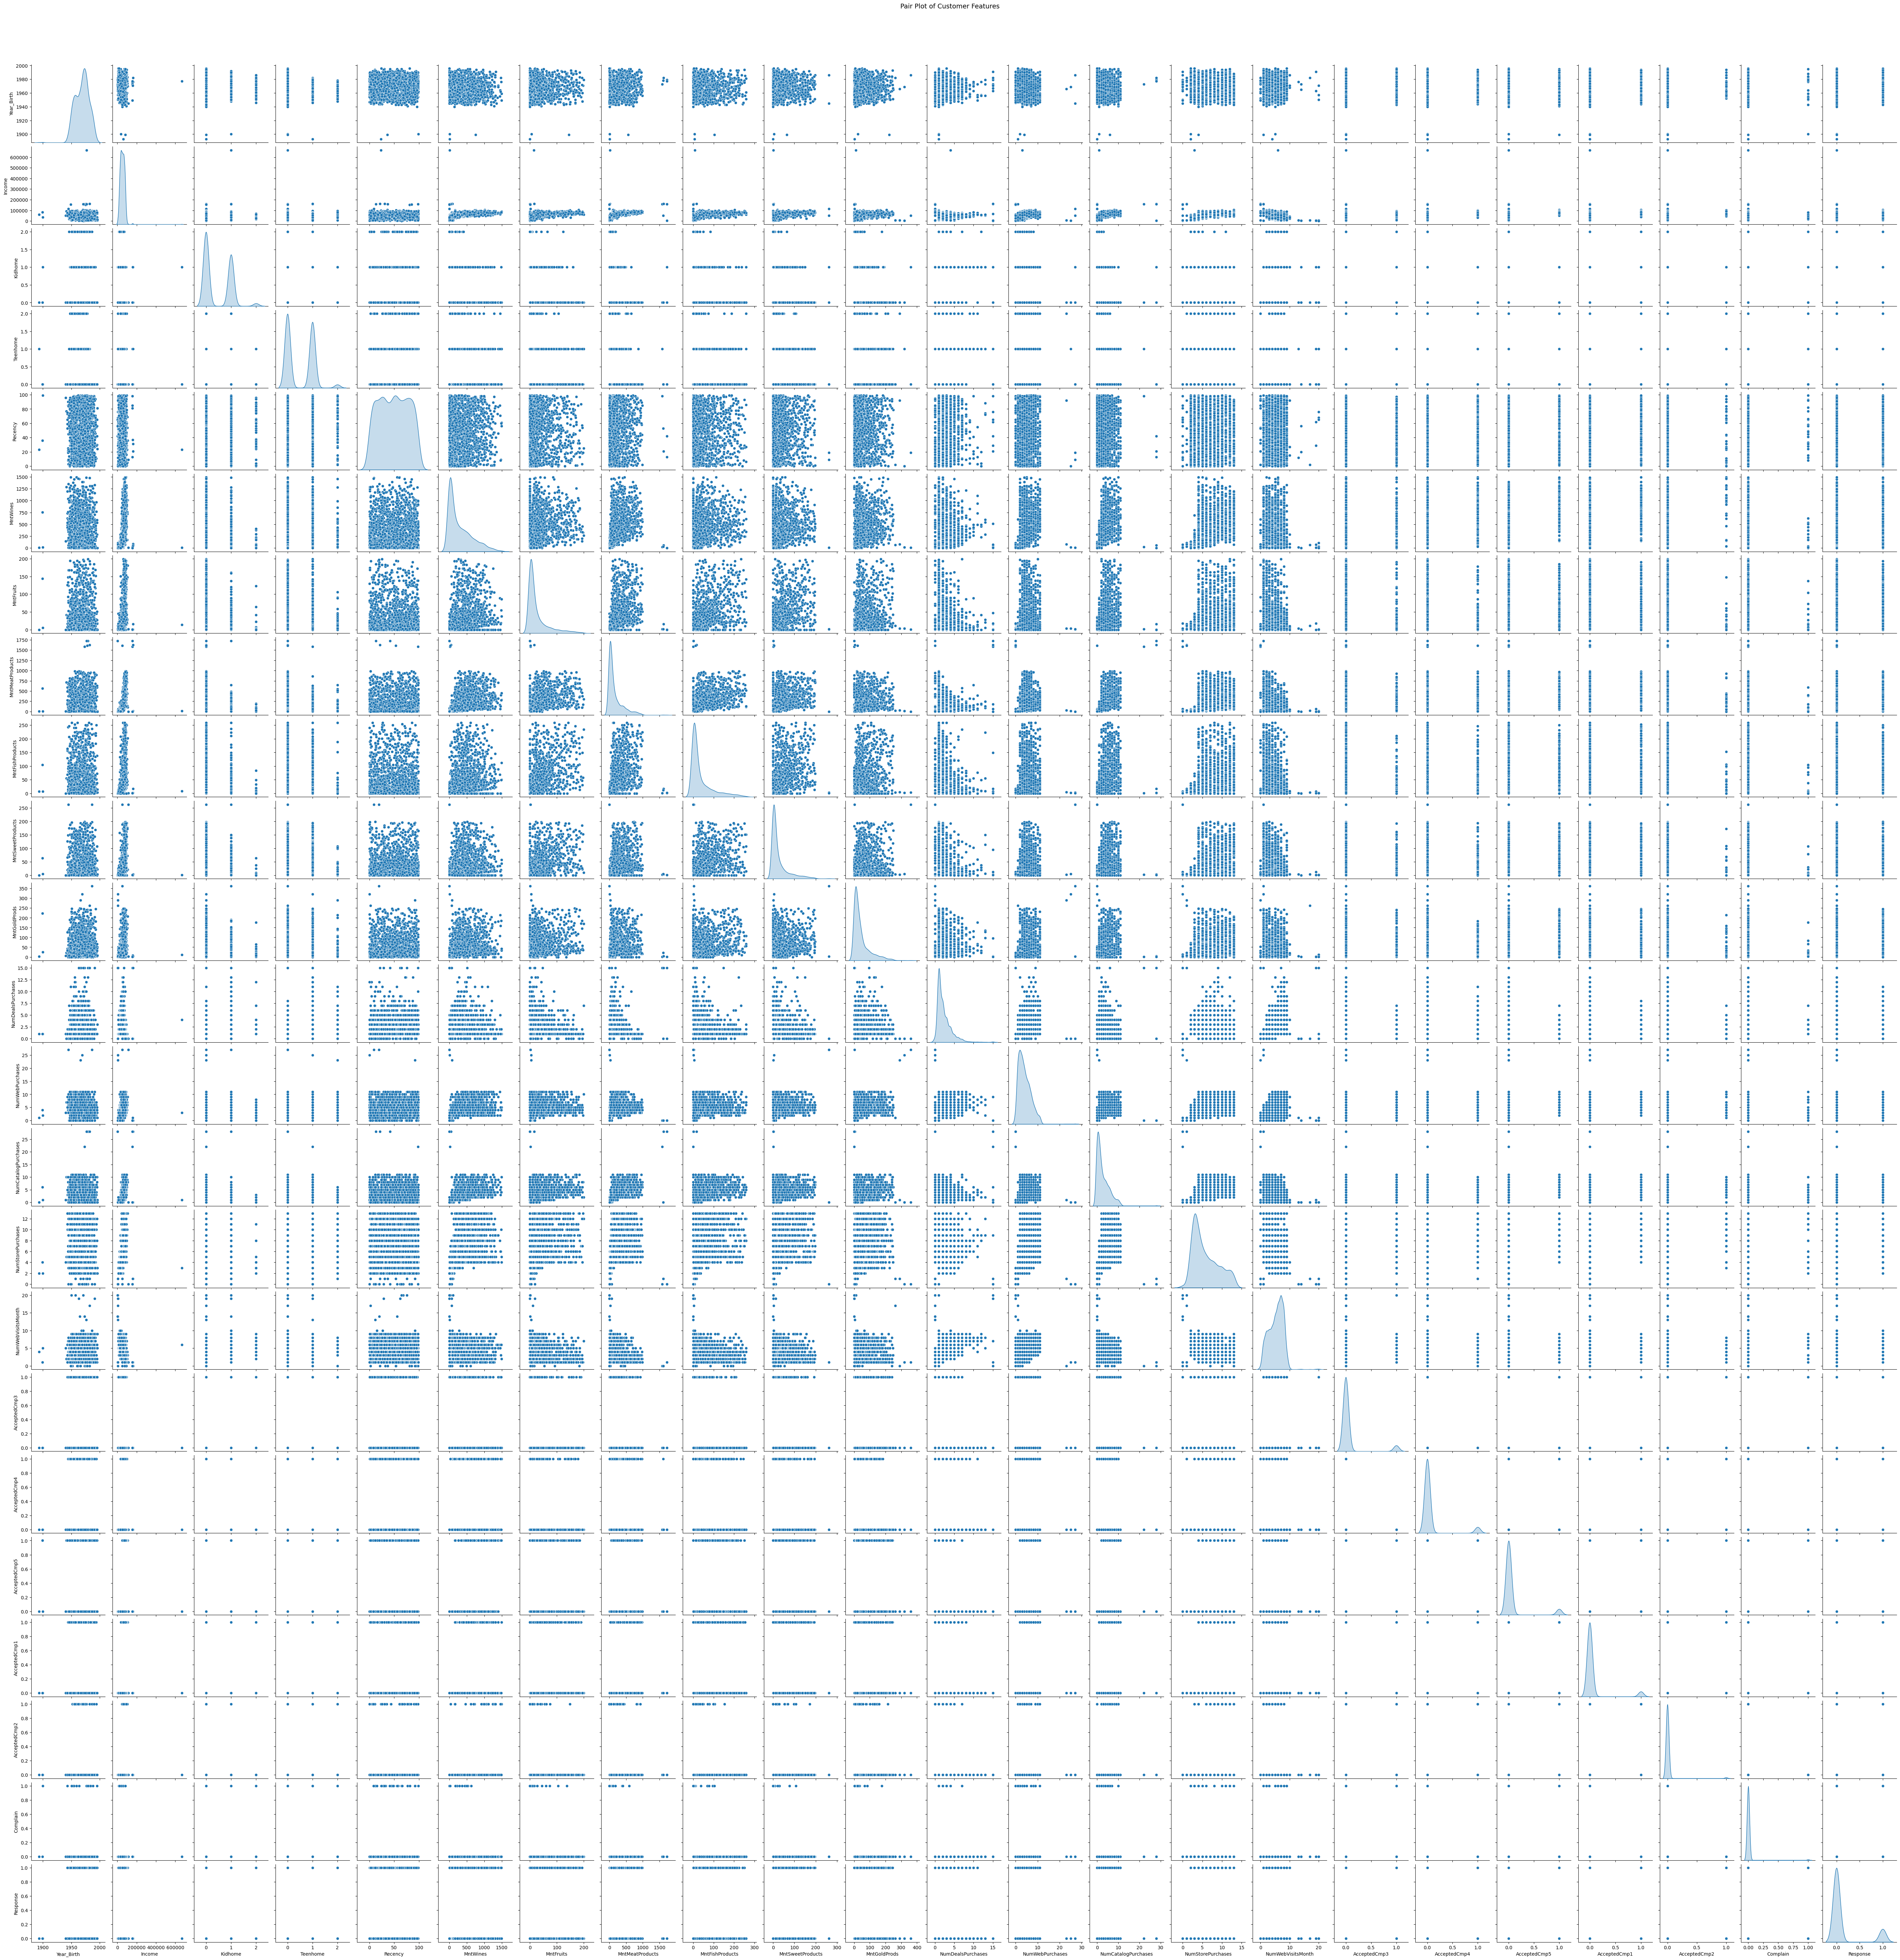

In [31]:
# Pair plot to visualize relationships between features
plt.figure(figsize=(10, 10))
sns.pairplot(numeric_data, diag_kind="kde")
plt.suptitle("Pair Plot of Customer Features", y=1.02, fontsize=14)
plt.show()

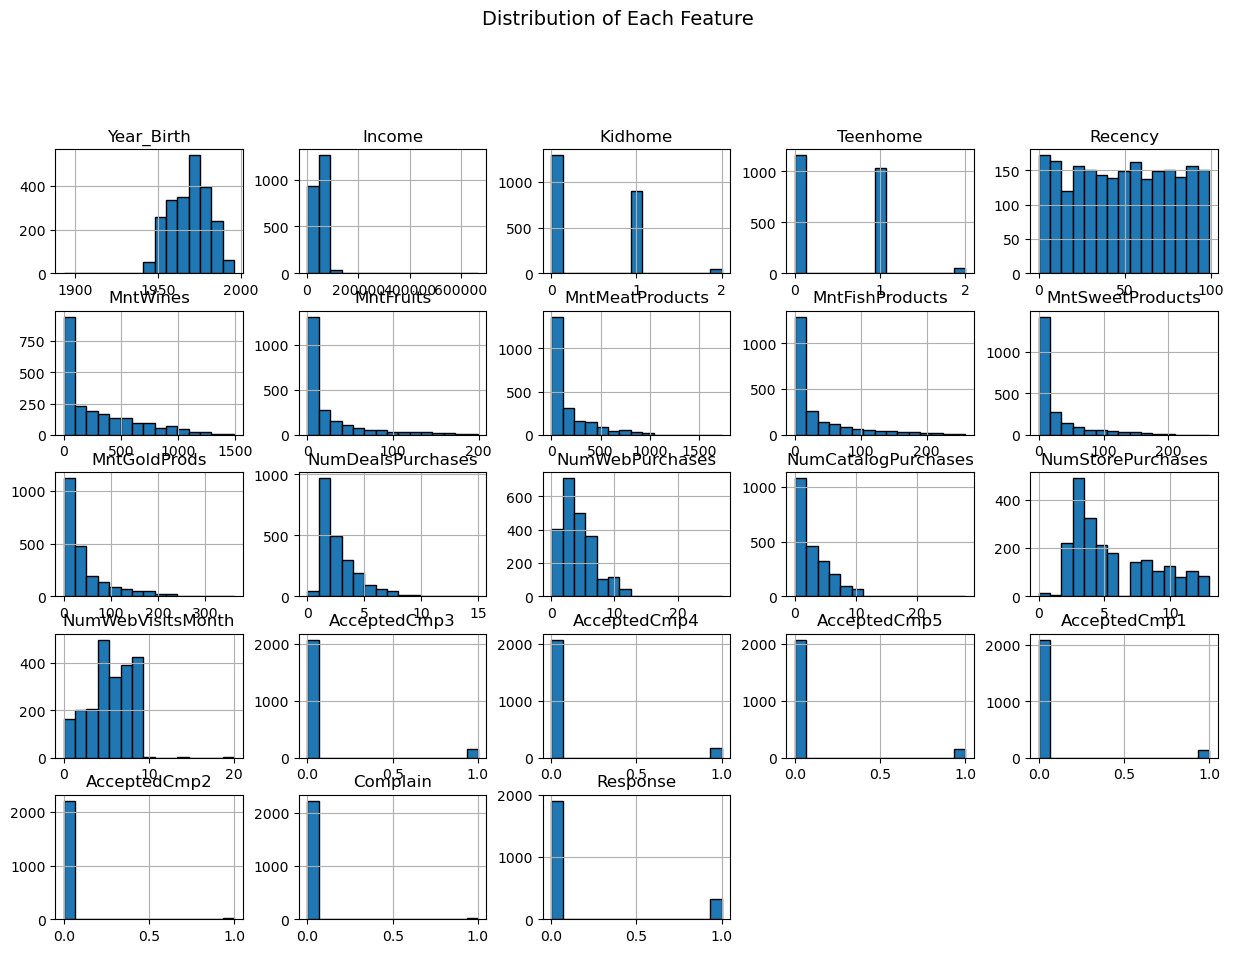

In [32]:
# Histogram for each feature
numeric_data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Each Feature", y=1.02, fontsize=14)
plt.show()

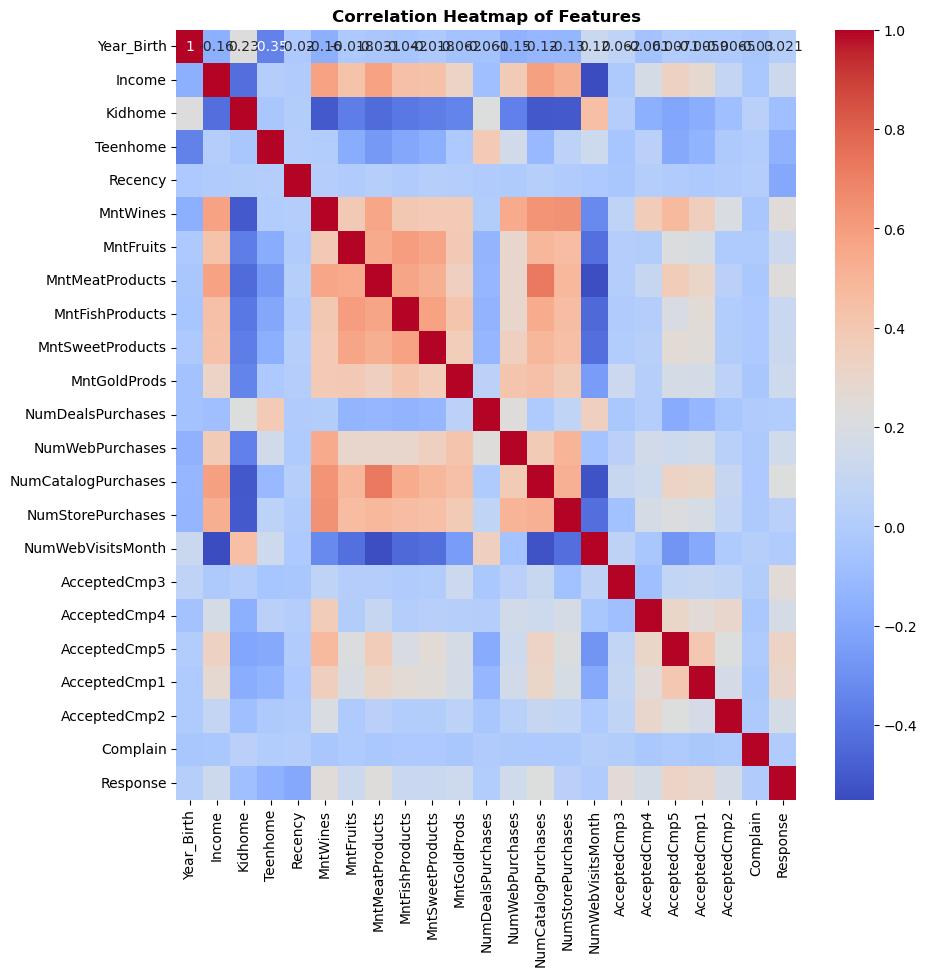

In [46]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features", fontsize=12, fontweight='bold')
plt.show()

In [34]:
# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

## #Step 3: K-means Clustering


In [35]:
# Determine optimal number of clusters using Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

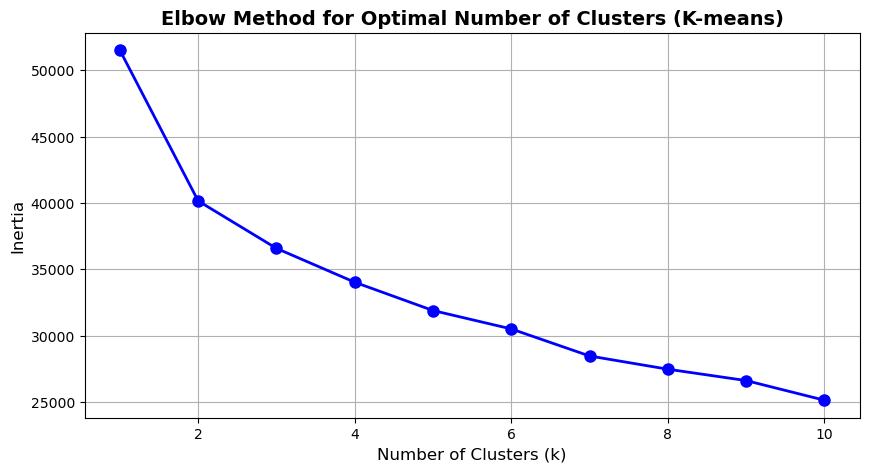

In [36]:
# Elbow plot
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal Number of Clusters (K-means)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [37]:
# Choose the optimal k based on the elbow point and fit KMeans
optimal_k = 3  # Set based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_clusters = kmeans.fit_predict(scaled_data)

In [38]:
# Visualize K-means Clustering results
pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)

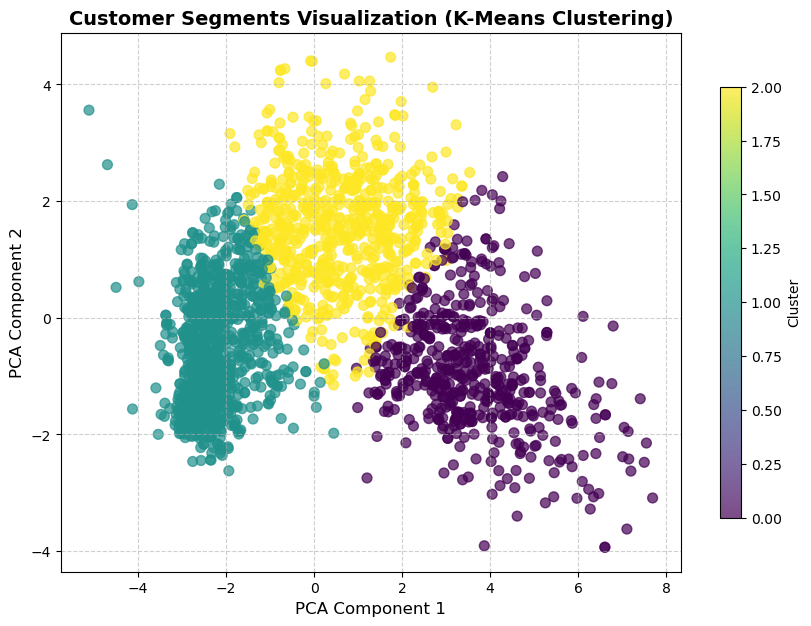

In [39]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', s=50, alpha=0.7)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.title('Customer Segments Visualization (K-Means Clustering)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster', shrink=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## # Step 4: Hierarchical Clustering


In [40]:
# Compute the linkage matrix for hierarchical clustering
linked = linkage(scaled_data, method='ward')

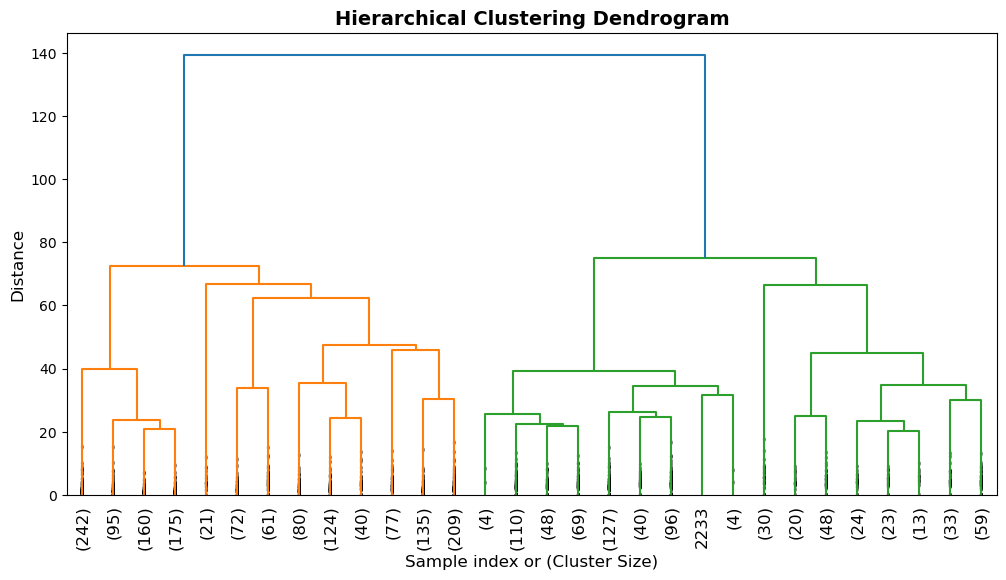

In [41]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
plt.xlabel('Sample index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

In [42]:
# Fit Hierarchical Clustering with a chosen number of clusters
hierarchical_clusters = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clusters.fit_predict(scaled_data)

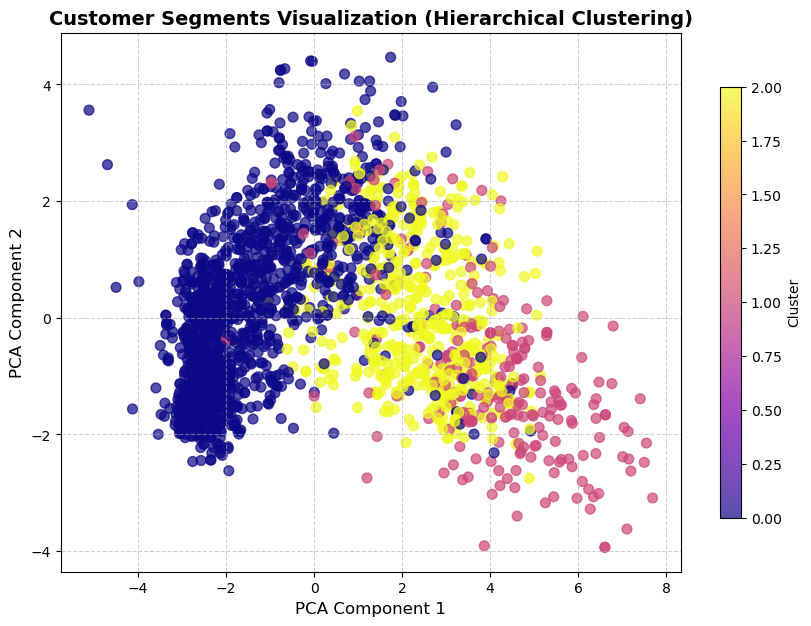

In [43]:
# Visualize Hierarchical Clustering results using PCA
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_labels, cmap='plasma', marker='o', s=50, alpha=0.7)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.title('Customer Segments Visualization (Hierarchical Clustering)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster', shrink=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()